 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

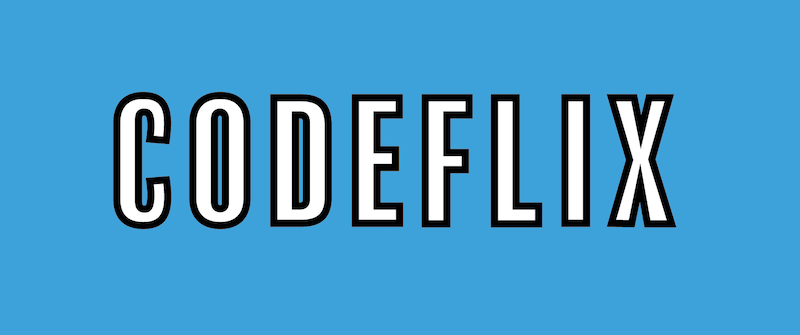

In [4]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

display(Image(generic_image))

In [5]:
class Video:
    def __init__(self):
        self.title = ''
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f'Now Playing {self.title}')
        display(Image(self.link))
        
    def pause(self):
        print('Video Paused')
        
    def __repr__(self):
        return f'{self.title} is {self.length.seconds} seconds long.'

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [6]:
class Movie(Video):
    pass

class Comercial(Video):
    
    def pause(self):
        return 'this action is unavailable'

In [8]:
# class child(parent)
class  Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.length = timedelta(minutes = data['runtime'])
        self.title = data['name']
        if data['image']:
            self.link = data['image']['medium']


## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [12]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query=''):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                query = ''
        
        # use data to fill attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API Call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f'Episode Error: status code {r.status_code}')
            return
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
     
    
    def play(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/N")
                if watching.lower().strip() not in ('yes','y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
                    

In [16]:
first_show = Series()
first_show.get_info()

What is the name of the series? batwoman
Batwoman has 51 episodes.


Now Playing Pilot


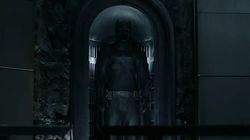

Now Playing The Rabbit Hole


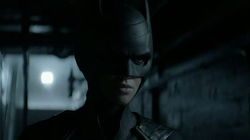

Now Playing Down, Down, Down


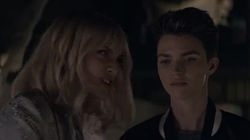

Are you still watching? y/Nn


In [17]:
first_show.play()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [18]:
(first_show)

51

In [50]:
class Theater(Extras):
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    
    # add_user 
    def add_user(self, name=''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        self.choose_user()
            
    # choose_user
    def choose_user(self):
        while True:
            print('Users:')
            for user in self.users:
                print(user)
            current = input('Choose a user: ')
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
            
    # add_to_watch_list
    def add_to_watch_list(self, query=""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist")
    
    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input('What do you want to watch? ')
        
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:   
            response = input(f'{watch} is not in your watch list. Would you like to add it? y/N')
            if response in ('yes','y'):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()

    # run 
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Sort   - Sort watch list by genre
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input('What would you like to do ( search, sort, watch, add, quit)')
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == 'sort':
                self.genre_search()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}.")
                break
            else:
                print('Incorrect input... Try again.')

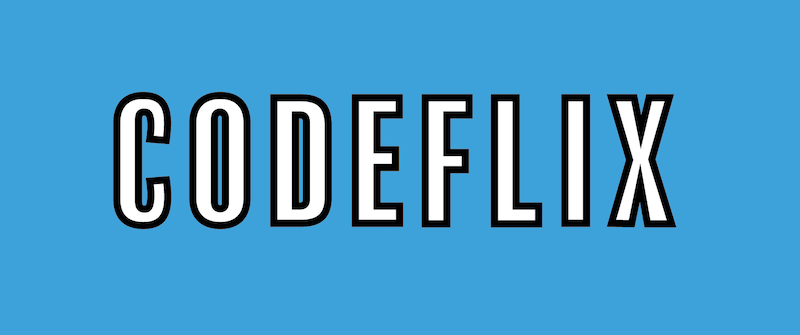

Create a profile: c
Users:
c
Choose a user: c
c

            What would you like to do?
            
            Search - Search for shows
            Sort   - Sort watch list by genre
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        
What would you like to do ( search, sort, watch, add, quit)search
What is the name of the series? the simpsons
The Simpsons has 729 episodes.
The Simpsons has been added to the watchlist
What would you like to do ( search, sort, watch, add, quit)search
What is the name of the series? adventure time
Adventure Time has 278 episodes.
Adventure Time has been added to the watchlist
What would you like to do ( search, sort, watch, add, quit)search
What is the name of the series? regular show
Regular Show has 246 episodes.
Regular Show has been added to the watchlist
What would you like to do ( search, sort, watch, add, quit)sort

Adventure

Children

Comedy

Family
Please cho

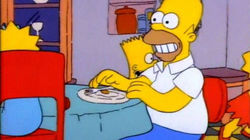



Title: Adventure Time | Episodes: 278

Summary: 
<p><b>Adventure Time's</b> unlikely heroes Finn and Jake are buddies who traverse the mystical Land of Ooo and encounter its colorful inhabitants.</p>


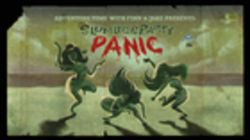



Title: Regular Show | Episodes: 246

Summary: 
<p>The<b> Regular Show</b> is about Mordecai and Rigby who are two best friends who take the problems and mundane tasks of their boring job to fantastical places.</p>


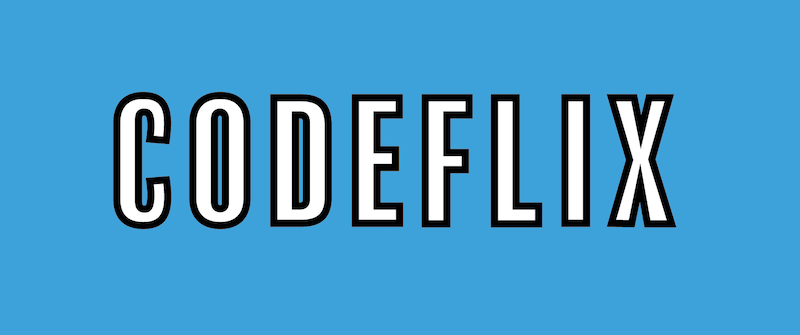

What would you like to do ( search, sort, watch, add, quit)quit
Thanks for watching c.


In [51]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [49]:
class Extras: 
    def genre_search(self):
        
#       Create a list with all the genres from watch list enterys
        genres = []
        for show in self.watch_list:
            for genre in show.genres:
                if genre not in genres:
                    genres.append(genre)
        for genre in sorted(genres):
            print(f"\n{genre}")

#       Asks for user for genre, then shows all shows in watch list with said genre, then ends the method
        while True:        
            choice = input("Please choose which of the listed genres you wish to filter your watch list by (or enter exit to go back): ")
            if choice.title().strip() in genres:
                for series in self.watch_list:
                    if choice.title() in series.genres:
                        print(f"\n\n{series} | Episodes: {len(series)}")
                        print(f"\nSummary: \n{series.summary}")
                        display(Image(series.episodes[0].link))
                break
            elif choice.lower().strip() == 'exit':
                break
            else:
                print('Your choice was not one one of the listed genres, please try again.')
# If the user has a large amount of shows in their watch list, this will alow them to narrow down their search for what to watch
# by genre instead of scrolling through an ever expanding watch list. It will also not allow for the search of a genre that is
# not held by at least one of the shows already on the watch list.